In [13]:
# load dfs
import pandas as pd

path="/home/niklas/Documents/Studium_Uni_Bamberg/Semester4/PWM-PT-HS5/dataall_data.csv"

data = pd.read_csv(path)
data.fillna(value=0,inplace=True)
df1=data[data["run"]==0]

df1.head()
#print(len(data))

,Unnamed: 0.1,Unnamed: 0,Step,AgentID,Info,Avg_PersonalizedTrust,GeneralizedTrust,Wealth,Suspectability,ID,SecurityLevel,Partner,out_degree,in_degree,pagerank,clustering,run,Memory,Threshold
0,0,0,39,60,0.0,-0.175218,-1.00000,-41.486966,-0.067099,60,13.516073,15,-6.483204,2.803406,0.009064,0.315692,0,0.0,0.0
1,1,1,39,43,0.0,-0.746286,-1.00000,-43.057234,0.412554,43,5.774469,27,-2.633990,-4.336436,0.009632,0.315692,0,0.0,0.0
2,2,2,39,68,0.0,-0.399341,-1.00000,-42.531423,-0.902807,68,1.394149,28,-4.987361,-2.877414,0.009314,0.315692,0,0.0,0.0
3,3,3,39,83,0.0,0.129676,0.30972,-51.795493,0.635566,83,15.933709,58,-3.300776,-1.528179,0.005805,0.315692,0,0.0,0.0
4,4,4,39,93,0.0,0.413338,1.00000,-34.650825,0.390681,93,6.647825,90,5.364560,-2.422805,0.011420,0.315692,0,0.0,0.0


In [34]:
import os
import glob

path="/home/niklas/Documents/Studium_Uni_Bamberg/Semester4/PWM-PT-HS5/data"

def load_network_data(path): 
    paths=[]
    for i,folder in enumerate(sorted(os.listdir(path),key=lambda x:int(x))):
        os.chdir(path+'/{}'.format(str(i+1)))
        fpath=glob.glob(os.path.join(path,folder,'network_data.{}'.format("csv")))
        paths.append(fpath)
    return paths
n_data=load_network_data(path)
n_df=pd.read_csv(n_data[1][0])
n_df.head()

,Unnamed: 0.1,Unnamed: 0,TotalWealth,GeneralizedTrustingAgents,GeneralizedMistrustingAgents,AvgPersonalizedTrust,AvgGeneralizedTrust,NumberOfNodes,Increase,Decrease,Threshold,avgClustering,edges,nodes,avg_influence
0,0,0,-116.514428,56,44,-0.201200,0.070514,100,7.333344,2.979547,0.430671,0.000000,100,100,0.0
1,1,1,-275.135632,56,44,-0.391313,0.070514,100,7.333344,2.979547,0.430671,0.000000,198,100,0.0
2,2,2,-470.423557,56,44,1.165478,0.070514,100,7.333344,2.979547,0.430671,0.010000,298,100,0.0
3,3,3,-702.378202,56,44,-0.498388,0.073602,100,7.333344,2.979547,0.430671,0.016667,394,100,0.0
4,4,4,-963.666224,56,44,-0.488791,0.072599,100,7.333344,2.979547,0.430671,0.026667,482,100,0.0


In [67]:
# combine dfs
path="/home/niklas/Documents/Studium_Uni_Bamberg/Semester4/PWM-PT-HS5/final_data"

def combine_dfs(data,n_data,path):
    df=pd.DataFrame()
    for i, nd in enumerate(n_data):
        n_df=pd.read_csv(nd[0])
        tmp=data.loc[(data["run"]==i) & (data["Step"]==99)]
        edges=n_df["edges"].iloc[98]
        tmp["edges"]=edges
        #tmp.to_csv(path+"/"+str(i)+".csv")
        df=pd.concat([df,tmp])
    
    df.to_csv(path+"/dataall.csv")

combine_dfs(data,n_data,path)


/tmp/ipykernel_6538/2061713052.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["edges"]=edges
/tmp/ipykernel_6538/2061713052.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["edges"]=edges
/tmp/ipykernel_6538/2061713052.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

In [69]:
import statsmodels.api as sm
import numpy as np
#check statsmodels regression implementation
path="/home/niklas/Documents/Studium_Uni_Bamberg/Semester4/PWM-PT-HS5/data"

X=data.loc[(data["Step"]==99)]
y=X["pagerank"]
X=X["Info"]
y=np.array(y)
X=np.array(X)
model2=sm.OLS(y,X)
coef=model2.fit()
print(coef.summary())
lat=coef.summary()
lat.as_latex()

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.001
Model:                            OLS   Adj. R-squared (uncentered):              0.000
Method:                 Least Squares   F-statistic:                              1.177
Date:                Wed, 27 Sep 2023   Prob (F-statistic):                       0.278
Time:                        10:18:31   Log-Likelihood:                          6254.7
No. Observations:                2000   AIC:                                 -1.251e+04
Df Residuals:                    1999   BIC:                                 -1.250e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

'\\begin{center}\n\\begin{tabular}{lclc}\n\\toprule\n\\textbf{Dep. Variable:}    &        y         & \\textbf{  R-squared (uncentered):}      &     0.001   \\\\\n\\textbf{Model:}            &       OLS        & \\textbf{  Adj. R-squared (uncentered):} &     0.000   \\\\\n\\textbf{Method:}           &  Least Squares   & \\textbf{  F-statistic:       }          &     1.177   \\\\\n\\textbf{Date:}             & Wed, 27 Sep 2023 & \\textbf{  Prob (F-statistic):}          &    0.278    \\\\\n\\textbf{Time:}             &     10:18:31     & \\textbf{  Log-Likelihood:    }          &    6254.7   \\\\\n\\textbf{No. Observations:} &        2000      & \\textbf{  AIC:               }          & -1.251e+04  \\\\\n\\textbf{Df Residuals:}     &        1999      & \\textbf{  BIC:               }          & -1.250e+04  \\\\\n\\textbf{Df Model:}         &           1      & \\textbf{                     }          &             \\\\\n\\textbf{Covariance Type:}  &    nonrobust     & \\textbf{         

In [70]:
X=data.loc[(data["Step"]==99)]
y=X["clustering"]
X=X["Info"]
y=np.array(y)
X=np.array(X)
model1=sm.OLS(y,X)
coef=model1.fit()
print(coef.summary())
lat=coef.summary()
lat.as_latex()

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.002
Model:                            OLS   Adj. R-squared (uncentered):              0.002
Method:                 Least Squares   F-statistic:                              4.350
Date:                Wed, 27 Sep 2023   Prob (F-statistic):                      0.0371
Time:                        10:18:34   Log-Likelihood:                         -1761.1
No. Observations:                2000   AIC:                                      3524.
Df Residuals:                    1999   BIC:                                      3530.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

'\\begin{center}\n\\begin{tabular}{lclc}\n\\toprule\n\\textbf{Dep. Variable:}    &        y         & \\textbf{  R-squared (uncentered):}      &     0.002   \\\\\n\\textbf{Model:}            &       OLS        & \\textbf{  Adj. R-squared (uncentered):} &     0.002   \\\\\n\\textbf{Method:}           &  Least Squares   & \\textbf{  F-statistic:       }          &     4.350   \\\\\n\\textbf{Date:}             & Wed, 27 Sep 2023 & \\textbf{  Prob (F-statistic):}          &   0.0371    \\\\\n\\textbf{Time:}             &     10:18:34     & \\textbf{  Log-Likelihood:    }          &   -1761.1   \\\\\n\\textbf{No. Observations:} &        2000      & \\textbf{  AIC:               }          &     3524.   \\\\\n\\textbf{Df Residuals:}     &        1999      & \\textbf{  BIC:               }          &     3530.   \\\\\n\\textbf{Df Model:}         &           1      & \\textbf{                     }          &             \\\\\n\\textbf{Covariance Type:}  &    nonrobust     & \\textbf{         

run
0     Axes(0.125,0.11;0.775x0.77)
1     Axes(0.125,0.11;0.775x0.77)
2     Axes(0.125,0.11;0.775x0.77)
3     Axes(0.125,0.11;0.775x0.77)
4     Axes(0.125,0.11;0.775x0.77)
5     Axes(0.125,0.11;0.775x0.77)
6     Axes(0.125,0.11;0.775x0.77)
7     Axes(0.125,0.11;0.775x0.77)
8     Axes(0.125,0.11;0.775x0.77)
9     Axes(0.125,0.11;0.775x0.77)
10    Axes(0.125,0.11;0.775x0.77)
11    Axes(0.125,0.11;0.775x0.77)
12    Axes(0.125,0.11;0.775x0.77)
13    Axes(0.125,0.11;0.775x0.77)
14    Axes(0.125,0.11;0.775x0.77)
15    Axes(0.125,0.11;0.775x0.77)
16    Axes(0.125,0.11;0.775x0.77)
17    Axes(0.125,0.11;0.775x0.77)
18    Axes(0.125,0.11;0.775x0.77)
19    Axes(0.125,0.11;0.775x0.77)
Name: clustering, dtype: object

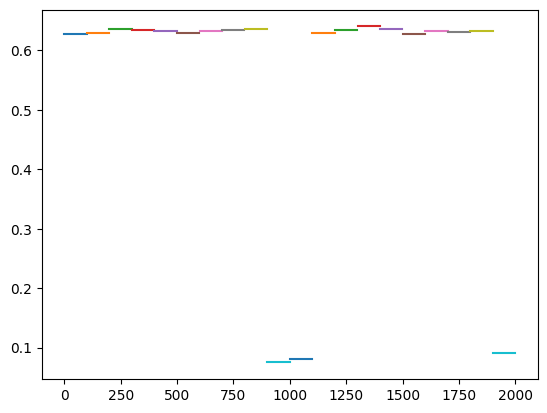

In [87]:
X=data.groupby(["run"])
cl = X["clustering"]
cl.plot()

run
0     Axes(0.125,0.11;0.775x0.77)
1     Axes(0.125,0.11;0.775x0.77)
2     Axes(0.125,0.11;0.775x0.77)
3     Axes(0.125,0.11;0.775x0.77)
4     Axes(0.125,0.11;0.775x0.77)
5     Axes(0.125,0.11;0.775x0.77)
6     Axes(0.125,0.11;0.775x0.77)
7     Axes(0.125,0.11;0.775x0.77)
8     Axes(0.125,0.11;0.775x0.77)
9     Axes(0.125,0.11;0.775x0.77)
10    Axes(0.125,0.11;0.775x0.77)
11    Axes(0.125,0.11;0.775x0.77)
12    Axes(0.125,0.11;0.775x0.77)
13    Axes(0.125,0.11;0.775x0.77)
14    Axes(0.125,0.11;0.775x0.77)
15    Axes(0.125,0.11;0.775x0.77)
16    Axes(0.125,0.11;0.775x0.77)
17    Axes(0.125,0.11;0.775x0.77)
18    Axes(0.125,0.11;0.775x0.77)
19    Axes(0.125,0.11;0.775x0.77)
Name: pagerank, dtype: object

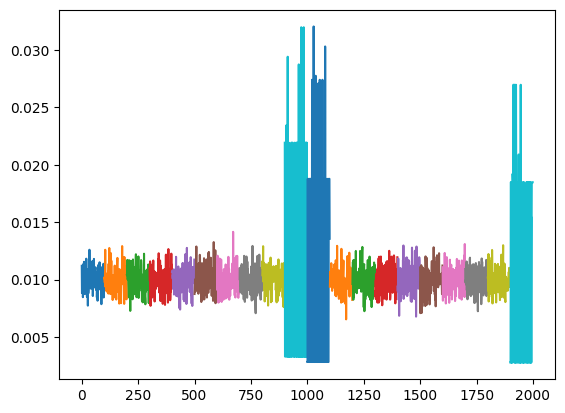

In [88]:
X=data.groupby("run")
pr = X["pagerank"]
pr.plot()

In [12]:
X=data.loc[(data["Step"]==99)]
y=X["clustering"]
X=X["Info"]
y=np.array(y)
X=np.array(X)
model3=sm.OLS(y,X)
coef=model3.fit()
print(coef.summary())
lat=coef.summary()
lat.as_latex()

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.002
Model:                            OLS   Adj. R-squared (uncentered):              0.002
Method:                 Least Squares   F-statistic:                              4.350
Date:                Wed, 27 Sep 2023   Prob (F-statistic):                      0.0371
Time:                        09:31:03   Log-Likelihood:                         -1761.1
No. Observations:                2000   AIC:                                      3524.
Df Residuals:                    1999   BIC:                                      3530.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

'\\begin{center}\n\\begin{tabular}{lclc}\n\\toprule\n\\textbf{Dep. Variable:}    &        y         & \\textbf{  R-squared (uncentered):}      &     0.002   \\\\\n\\textbf{Model:}            &       OLS        & \\textbf{  Adj. R-squared (uncentered):} &     0.002   \\\\\n\\textbf{Method:}           &  Least Squares   & \\textbf{  F-statistic:       }          &     4.350   \\\\\n\\textbf{Date:}             & Wed, 27 Sep 2023 & \\textbf{  Prob (F-statistic):}          &   0.0371    \\\\\n\\textbf{Time:}             &     09:31:03     & \\textbf{  Log-Likelihood:    }          &   -1761.1   \\\\\n\\textbf{No. Observations:} &        2000      & \\textbf{  AIC:               }          &     3524.   \\\\\n\\textbf{Df Residuals:}     &        1999      & \\textbf{  BIC:               }          &     3530.   \\\\\n\\textbf{Df Model:}         &           1      & \\textbf{                     }          &             \\\\\n\\textbf{Covariance Type:}  &    nonrobust     & \\textbf{         